# Hello, and welcome to my first attempt at the Titanic Survival Kaggle Competition!
First, let's download and import the Kaggle API we will be using to acquire the datasets, then download the titanic.zip file, extract the files within, and save them as objects; we will be using these throughout the notebook.

Note: For this to function properly, you will have to have a Kaggle API token

In [52]:
try:
    import kaggle
    print('kaggle imported!')
except:
    !pip install kaggle
    import kaggle
    print('kaggle installed and imported!')
import pandas as pd
import zipfile
kaggle.api.authenticate()
kaggle.api.competition_download_files('titanic', quiet = False)
with zipfile.ZipFile('titanic.zip', 'r') as zip_file:
    zip_file.extractall('extracted_files/')
train_data = pd.read_csv('extracted_files/train.csv')
test_data = pd.read_csv('extracted_files/test.csv')

kaggle imported!
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Our training and test datasets look correct, and we can see in our training dataset that we have a mixture of numeric and categorical features. In addition, the Cabin feature is over 80% null values, which may warrant our dropping alltogether. Let's look at that and other potenially problematic features by doing some EDA.

# Exploratory Data Analysis

## Effect of Pclass on Survival
The chi-square test run on the survival matrix of the classes and the visualization of the survival rate by class via barplot suggest class had a heavy impact on survival rate.

In [56]:
#Get counts of surviving and deceased members of each class
surviving_1st = len(train_data[(train_data['Pclass'] == 1) & (train_data['Survived'] == 1)])
surviving_2nd = len(train_data[(train_data['Pclass'] == 2) & (train_data['Survived'] == 1)])
surviving_3rd = len(train_data[(train_data['Pclass'] == 3) & (train_data['Survived'] == 1)])
deceased_1st = len(train_data[(train_data['Pclass'] == 1) & (train_data['Survived'] == 0)])
deceased_2nd = len(train_data[(train_data['Pclass'] == 2) & (train_data['Survived'] == 0)])
deceased_3rd = len(train_data[(train_data['Pclass'] == 3) & (train_data['Survived'] == 0)])

print(f'Surviving 1st: {surviving_1st} | Deceased 1st: {deceased_1st} | Total 1st: {surviving_1st + deceased_1st}')
print(f'Surviving 2nd: {surviving_2nd} | Deceased 2nd: {deceased_2nd} | Total 2nd: {surviving_2nd + deceased_2nd}')
print(f'Surviving 3rd: {surviving_3rd} | Deceased 3rd: {deceased_3rd} | Total 3rd: {surviving_3rd + deceased_3rd}')

Surviving 1st: 136 | Deceased 1st: 80 | Total 1st: 216
Surviving 2nd: 87 | Deceased 2nd: 97 | Total 2nd: 184
Surviving 3rd: 119 | Deceased 3rd: 372 | Total 3rd: 491


In [57]:
#Chi-Squre test on survival by class matrix
import numpy as np
from scipy.stats import chi2_contingency
Pclass_survival_array = np.array([[surviving_1st, surviving_2nd, surviving_3rd],
                                 [deceased_1st, deceased_2nd, deceased_3rd]])
print(pd.DataFrame(Pclass_survival_array, columns = ['1st Class', '2nd Class', '3rd Class'], index = ['Survived', 'Deceased']))
print(f'Chi-Squre P_value: {chi2_contingency(Pclass_survival_array).pvalue}')

          1st Class  2nd Class  3rd Class
Survived        136         87        119
Deceased         80         97        372
Chi-Squre P_value: 4.5492517112987287e-23


Text(0.5, 1.0, 'Survival Rate by Class')

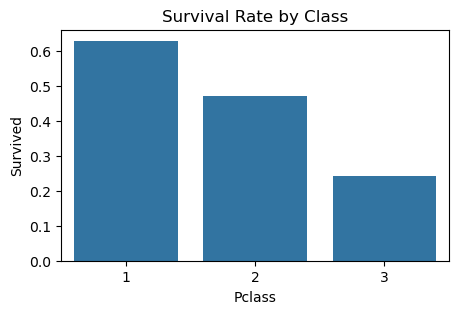

In [58]:
#Visualize survival rates with bargraph
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
sns.barplot(train_data.groupby('Pclass')['Survived'].mean())
plt.title('Survival Rate by Class')

## Effect of Sex on Survival 

The chi-square test and visualizatin suggest sex has a large impact on survival

In [59]:
surviving_fem = len(train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)])
surviving_male = len(train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)])
deceased_fem = len(train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 0)])
deceased_male = len(train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 0)])
gender_matrix = np.array([[surviving_fem, surviving_male], [deceased_fem, deceased_male]])
print(pd.DataFrame(gender_matrix, index = ['Survived', 'Deceased'], columns = ['Female' ,'Male']))
print(f'chi-square p_value: {chi2_contingency(gender_matrix).pvalue}')

          Female  Male
Survived     233   109
Deceased      81   468
chi-square p_value: 1.1973570627755645e-58


Text(0, 0.5, 'Survival Rate')

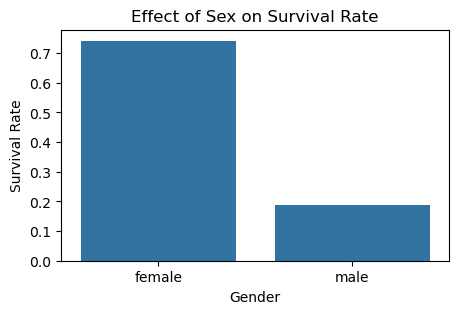

In [60]:
plt.figure(figsize = (5, 3))
sns.barplot(train_data.groupby('Sex')['Survived'].mean())
plt.title('Effect of Sex on Survival Rate')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

## Effect of Age on Survival 
After dropping NA values, Welch's T-test (assuming unequal variances) was run on the two Age populations (Survived vs Deceased). The p_value (0.04118) suggets the two populations are significantly different.

C:\Users\akozi\AppData\Local\Temp\ipykernel_13448\2471660447.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_survived = age_data[train_data['Survived'] == 1]
C:\Users\akozi\AppData\Local\Temp\ipykernel_13448\2471660447.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_deceased = age_data[train_data['Survived'] == 0]


Text(0.5, 0, 'Ages')

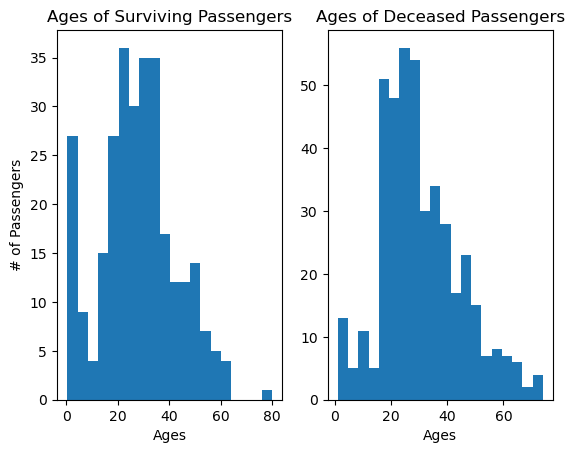

In [61]:
#create histograms for ages of survivng and deceased passengers. Use dropna() to omitt NaN values.
age_data = train_data.dropna(subset = 'Age')
age_survived = age_data[train_data['Survived'] == 1]
age_deceased = age_data[train_data['Survived'] == 0]
plt.subplot(1, 2, 1)
plt.hist(age_survived['Age'], bins = 20)
plt.title('Ages of Surviving Passengers')
plt.xlabel('Ages')
plt.ylabel('# of Passengers')
plt.subplot(1, 2, 2)
plt.hist(age_deceased['Age'], bins = 20)
plt.title('Ages of Deceased Passengers')
plt.xlabel('Ages')

In [62]:
#perform Welch's T-Test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(age_survived['Age'], age_deceased['Age'], equal_var = False)
print(f"Welch's T-Test | t_statistic: {t_statistic} | p_value: {p_value}")

Welch's T-Test | t_statistic: -2.0460301043939704 | p_value: 0.04118965162586639


## Effect of SibSp on Survival 

The chi-square test and visualization suggest that survival rate is best for those with 1 sibling or spouse on board. The most notable difference is the discrepancy between 0 spouses/siblings and 1, which both have large sample sizes and suggest a clear difference.

In [63]:
unique_sibsp = sorted(list(train_data['SibSp'].unique()))
survived = []
deceased = []
for num in unique_sibsp:
    survived.append(len(train_data[(train_data['SibSp'] == num) & (train_data['Survived'] == 1)]))
    deceased.append(len(train_data[(train_data['SibSp'] == num) & (train_data['Survived'] == 0)]))
sibsp_matrix = np.array([survived, deceased])
print(pd.DataFrame(sibsp_matrix, columns = unique_sibsp, index = ['Surived', 'Deceased']))
print(f'p_value: {chi2_contingency(sibsp_matrix).pvalue}')

            0    1   2   3   4  5  8
Surived   210  112  13   4   3  0  0
Deceased  398   97  15  12  15  5  7
p_value: 1.558581046590206e-06


In [64]:
train_data.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Text(0.5, 0, '# of Siblings and Spouses')

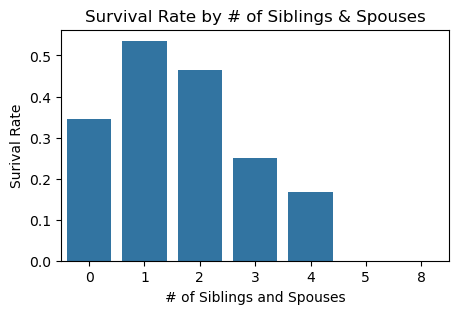

In [65]:
plt.figure(figsize = (5, 3))
sns.barplot(train_data.groupby('SibSp')['Survived'].mean())
plt.title('Survival Rate by # of Siblings & Spouses')
plt.ylabel('Surival Rate')
plt.xlabel('# of Siblings and Spouses')

## Effect of Parch on Survival 

The chi-square test and the visualization suggest a statistical meaningfulness to the difference in survival rate of passengers with varying numbers of parents/children on board. Notably, like with SibSp, having 0 parents or childen on board worsens chances of survival overall.

In [66]:
unique_parch = sorted(list(train_data['Parch'].unique()))
unique_parch.remove(6)#have to remove the entry with parch = 6 or the chi-square code will error
survived = []
deceased = []
for num in unique_parch:
    survived.append(len(train_data[(train_data['Parch'] == num) & (train_data['Survived'] == 1)]))
    deceased.append(len(train_data[(train_data['Parch'] == num) & (train_data['Survived'] == 0)]))
parch_matrix = np.array([survived, deceased])
print(pd.DataFrame(parch_matrix, columns = unique_parch, index = ['Surived', 'Deceased']))
print(f'p_value: {chi2_contingency(parch_matrix).pvalue}')

            0   1   2  3  4  5
Surived   233  65  40  3  0  1
Deceased  445  53  40  2  4  4
p_value: 5.006995217279716e-05


In [67]:
train_data.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Text(0.5, 0, '# of Parents & Children')

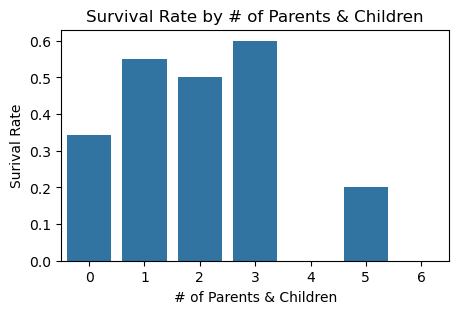

In [68]:
plt.figure(figsize = (5, 3))
sns.barplot(train_data.groupby('Parch')['Survived'].mean())
plt.title('Survival Rate by # of Parents & Children')
plt.ylabel('Surival Rate')
plt.xlabel('# of Parents & Children')

## Effect of Fare on Survival 

Log transforming the data helps to make the data more normal the outliers less pronnouned. When Welch's t-test is run on the log transformed fares of the surviving and deceased passengers, the two populations are revealed to be statistically distinct (p value of 1.808217729927348e-22). Additionally, the median value of each population (survivors: 3.30 and deceased: 2.44) also suggests a significant difference.

Text(0, 0.5, '')

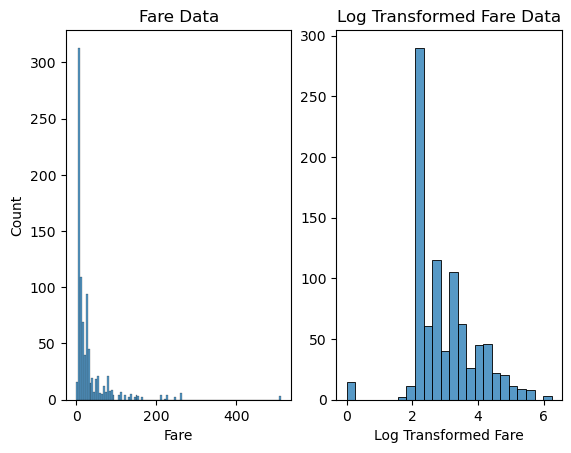

In [69]:
plt.subplot(1, 2, 1)
sns.histplot(data = train_data['Fare'])# histogram showing Fare data.
plt.title('Fare Data')
log_fare = np.log(train_data['Fare'] + 1)# log transform Fare data, adding 1 to deal with errors caused by 0 values.
plt.subplot(1, 2, 2)
sns.histplot(data = log_fare)# histogram showing log transformed Fare data.
plt.title('Log Transformed Fare Data')
plt.xlabel('Log Transformed Fare')
plt.ylabel("")

In [70]:
print(f'Entries where Fare is Zero: {len(train_data[train_data['Fare']==0])}')

Entries where Fare is Zero: 15


Entries where Fare is Zero have many NaN Age values. Almost all did not survive (14/15)

In [71]:
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Text(0, 0.5, '')

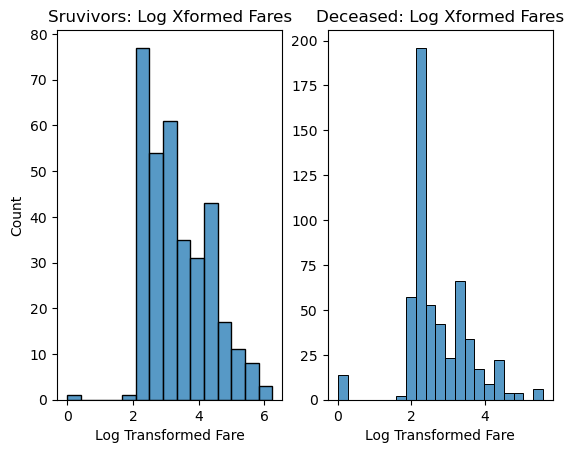

In [72]:
log_fare_train_data = train_data
log_fare_train_data['Fare'] = np.log(log_fare_train_data['Fare'] + 1)
log_fare_train_data_s = log_fare_train_data[log_fare_train_data['Survived'] == 1]
log_fare_train_data_d = log_fare_train_data[log_fare_train_data['Survived'] == 0]
plt.subplot(1,2,1)
sns.histplot(log_fare_train_data_s['Fare'])
plt.title('Sruvivors: Log Xformed Fares')
plt.xlabel('Log Transformed Fare')
plt.subplot(1,2,2)
plt.title('Deceased: Log Xformed Fares')
sns.histplot(log_fare_train_data_d['Fare'])
plt.xlabel('Log Transformed Fare')
plt.ylabel("")

In [73]:
t_statistic, p_value = stats.ttest_ind(log_fare_train_data_s['Fare'], log_fare_train_data_d['Fare'], equal_var = False)
print(f"Welch's T-Test | t_statistic: {t_statistic} | p_value: {p_value}")
print(f'Median fare of survivors: {log_fare_train_data_s['Fare'].median()} | Median fare of deceased: {log_fare_train_data_d['Fare'].median()}')

Welch's T-Test | t_statistic: 10.120535132118768 | p_value: 1.808217729927348e-22
Median fare of survivors: 3.295836866004329 | Median fare of deceased: 2.4423470353692043


## Effect of Embarkation Point on Survival

There is a surprising difference in the survival rate based on embarkation point. However, this difference will likely be attributed to the fact that the embarkation point with the highest survival rate (C) also has the higest ratio of 1st class passengers, which we have already observed to have a higher survival rate. Therefore, this effect is probably due to the class difference.

In [74]:
embark_data = train_data.dropna(subset = 'Embarked')# remove NaN results for EDA

In [75]:
e_survived = []
e_deceased = []
e_unique = embark_data['Embarked'].unique()
for i in e_unique:
    e_survived.append(len(embark_data[(embark_data['Embarked'] == i) & (embark_data['Survived'] == 1)]))
    e_deceased.append(len(embark_data[(embark_data['Embarked'] == i) & (embark_data['Survived'] == 0)]))
embark_matrix = np.array([e_survived, e_deceased])
print(pd.DataFrame(embark_matrix, index = ['Survived', 'Deceased'], columns = ['S', 'C', 'Q']))
print(f'chi-square p_value: {chi2_contingency(embark_matrix).pvalue}')

            S   C   Q
Survived  217  93  30
Deceased  427  75  47
chi-square p_value: 1.769922284120912e-06


Text(0, 0.5, 'Survival Rate')

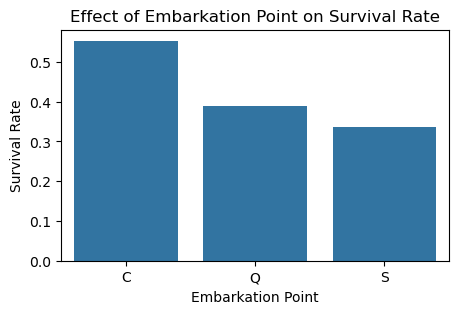

In [76]:
plt.figure(figsize = (5, 3))
sns.barplot(embark_data.groupby('Embarked')['Survived'].mean())
plt.title('Effect of Embarkation Point on Survival Rate')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')

In [77]:
embark_data.groupby('Embarked')['Pclass'].value_counts()# visualize counts of Pclass by embarkation point

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: count, dtype: int64

In [78]:
#finding the proportions of first class passengers per embarkation point
C_1st_ratio = len(train_data[(train_data['Embarked'] == 'C') & (train_data['Pclass'] == 1)]) / len(train_data[train_data['Embarked'] == 'C'])
Q_1st_ratio = len(train_data[(train_data['Embarked'] == 'Q') & (train_data['Pclass'] == 1)]) / len(train_data[train_data['Embarked'] == 'Q'])
S_1st_ratio = len(train_data[(train_data['Embarked'] == 'S') & (train_data['Pclass'] == 1)]) / len(train_data[train_data['Embarked'] == 'S'])
print(f'Ratio of 1st Class from C: {C_1st_ratio}')
print(f'Ratio of 1st Class from Q: {Q_1st_ratio}')
print(f'Ratio of 1st Class from S: {S_1st_ratio}')

Ratio of 1st Class from C: 0.5059523809523809
Ratio of 1st Class from Q: 0.025974025974025976
Ratio of 1st Class from S: 0.1972049689440994


## Identifying Outliers in Numerical Data

In examining distributiona and Z-scores of the Age and Log Transformed Fare values, it does not seem as though there are any outliers due to obvious data entry or sampling errors, so we will elect not to remove any outliers beyond 1.5x IQR, nor those that have zscores greater than 3 or less than -3.

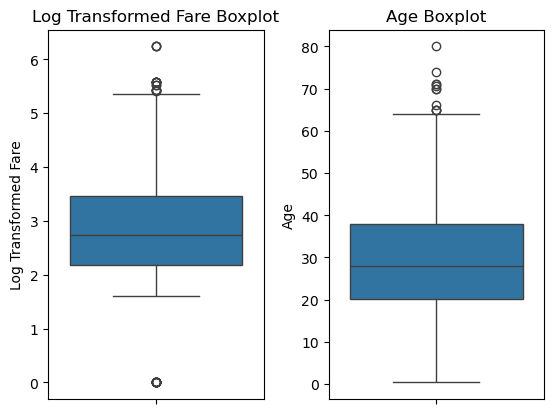

In [79]:
plt.subplot(1, 2, 1)
sns.boxplot(train_data['Fare'])
plt.ylabel('Log Transformed Fare')
plt.title('Log Transformed Fare Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(train_data['Age'])
plt.title('Age Boxplot')
plt.subplots_adjust(wspace = 0.3)

In [80]:
age_z_scores = pd.DataFrame({'Age': stats.zscore(train_data.dropna(subset = 'Age')['Age'])}).sort_values(by = 'Age', ascending = False)
fare_z_scores = pd.DataFrame({'Fare': stats.zscore(train_data.dropna(subset = 'Fare')['Fare'])}).sort_values(by = 'Fare', ascending = False)
age_zscore_outliers = age_z_scores[age_z_scores['Age'] >= 3]
fare_zscore_outliers = fare_z_scores[fare_z_scores['Fare'] >= 3]
print(age_zscore_outliers)
print(fare_zscore_outliers)

          Age
630  3.465126
851  3.051798
         Fare
258  3.385294
737  3.385294
679  3.385294


# Preparing the Data for Modeling

The Cabin, Ticket, and Name features all have issues. We could choose to go in depth with them and try to elucidate some meaningful insights by grouping the data with by certain string prefixes, etc, but the heterogenous nature of the features makes that difficult and perhaps not worth the effort. For this simple look through, we will therefore omit them. We will start preparing the data by sorting the data into numeric and categorical data, and the latter will be encoded via OneHotEncoding.

In [81]:
prep_train_data = train_data.copy()
prep_train_data = prep_train_data.drop(['Cabin', 'Ticket', 'Name', 'Survived', 'PassengerId'], axis = 1)
prep_train_data['Pclass'] = prep_train_data['Pclass'].astype('object')# change Pclass data type to object
numeric_columns = prep_train_data.select_dtypes(include = np.number).columns.to_list()
object_columns = prep_train_data.select_dtypes(include = 'object').columns.to_list()
print(f'numeric columns: {numeric_columns}')
print(f'object columns: {object_columns}')

numeric columns: ['Age', 'SibSp', 'Parch', 'Fare']
object columns: ['Pclass', 'Sex', 'Embarked']


Here we are splitting the train dataset into numeric and object sets, then encoding the object train data set.

In [82]:
from sklearn.preprocessing import OneHotEncoder
num_train_data = prep_train_data[numeric_columns]
obj_train_data = prep_train_data[object_columns]
encoder = OneHotEncoder(sparse_output = False)
obj_train_data = encoder.fit_transform(obj_train_data)
obj_train_data = pd.DataFrame(obj_train_data, columns = encoder.get_feature_names_out(['Pclass', 'Sex', 'Embarked']))
xformed_train_data = pd.concat([num_train_data, obj_train_data], axis = 1)
xformed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           714 non-null    float64
 1   SibSp         891 non-null    int64  
 2   Parch         891 non-null    int64  
 3   Fare          891 non-null    float64
 4   Pclass_1      891 non-null    float64
 5   Pclass_2      891 non-null    float64
 6   Pclass_3      891 non-null    float64
 7   Sex_female    891 non-null    float64
 8   Sex_male      891 non-null    float64
 9   Embarked_C    891 non-null    float64
 10  Embarked_Q    891 non-null    float64
 11  Embarked_S    891 non-null    float64
 12  Embarked_nan  891 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 90.6 KB


Since there are so many N/A entries for Age, and it is a feature we would like to keep, we will use a Simple Imputer from Sklearn to replace the N/A values with the average Age.

In [83]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy = 'mean')
xformed_train_data['Age'] = imputer_mean.fit_transform(xformed_train_data[['Age']])
xformed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           891 non-null    float64
 1   SibSp         891 non-null    int64  
 2   Parch         891 non-null    int64  
 3   Fare          891 non-null    float64
 4   Pclass_1      891 non-null    float64
 5   Pclass_2      891 non-null    float64
 6   Pclass_3      891 non-null    float64
 7   Sex_female    891 non-null    float64
 8   Sex_male      891 non-null    float64
 9   Embarked_C    891 non-null    float64
 10  Embarked_Q    891 non-null    float64
 11  Embarked_S    891 non-null    float64
 12  Embarked_nan  891 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 90.6 KB


Finally, we will split our data into training and validation sets. This will leave our test set untouched for our final evaluations.

# Modeling

We will use GidSearchCV to evaluate a series of classification models and use Classification Reports to compare their performance.

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(xformed_train_data, train_data['Survived'], random_state = 42, test_size = 0.2)
lr = LogisticRegression()
lr_param_grid = {
    'C' : [0.1, 1, 10],
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['liblinear', 'saga', 'sag', 'newton-cg', 'lbgfgs'],
    'max_iter': [1000]
}

In [85]:
import warnings
warnings.filterwarnings("ignore")
lr_grid_search = GridSearchCV(estimator = lr, param_grid = lr_param_grid, cv = 3, scoring = 'accuracy')
lr_grid_search.fit(X_train, y_train)
print(lr_grid_search.best_params_)
warnings.filterwarnings("always")

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}


In [86]:
from sklearn.metrics import classification_report
lr_preds = lr_grid_search.predict(X_test)
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [87]:
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth':[10, 20, 30, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
}
dt_grid_search = GridSearchCV(estimator = dtm, param_grid = dt_param_grid, scoring = 'accuracy', cv = 5)
dt_grid_search.fit(X_train, y_train)
tree_preds = dt_grid_search.predict(X_test)
print(dt_grid_search.best_params_)
print(classification_report(y_test, tree_preds))

{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [88]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rf_param_grid = {
    'max_depth': [5, 10, None],
    'max_features':[5, 10, None],
    'min_samples_leaf':[1, 5, 10],
    'criterion':['gini', 'entropy'],
    'n_estimators':[50, 100]
}
rf_grid_search = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'accuracy', cv = 3)
rf_grid_search.fit(X_train, y_train)
print(rf_grid_search.best_params_)
rf_preds = rf_grid_search.predict(X_test)
print(classification_report(y_test, rf_preds))

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       105
           1       0.81      0.64      0.71        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



In [89]:
!pip install xgboost

C:\Users\akozi\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\akozi\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\akozi\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [90]:
import xgboost as xgb
xgbm = xgb.XGBClassifier(objective = 'binary:logistic')
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}
xgb_grid_search = GridSearchCV(estimator = xgbm, param_grid = param_grid, scoring = 'accuracy', cv = 3)
xgb_grid_search.fit(X_train, y_train)
xgb_preds = xgb_grid_search.predict(X_test)
print(xgb_grid_search.best_params_)
print(classification_report(y_test, xgb_preds))

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [91]:
lr_grid_search.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}

After using GridSerachCV to find the optimal parameters (of those listed in the parameter grids) for each classifier, we will instantiate new models and set their parameters to those identified via the Grid Searches.

In [92]:
best_lr_model = LogisticRegression()
best_lr_model.set_params(**lr_grid_search.best_params_)
best_dt_model = DecisionTreeClassifier()
best_dt_model.set_params(**dt_grid_search.best_params_)
best_rf_model = RandomForestClassifier()
best_rf_model.set_params(**rf_grid_search.best_params_)
best_xgb_model = xgb.XGBClassifier()
best_xgb_model.set_params(**xgb_grid_search.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

Finally, we will quickly evaluate an ensemble Voting Classifier.

In [93]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators = [('lr', best_lr_model), ('dt', best_dt_model)])
voting_model.fit(X_train, y_train)
voting_preds = voting_model.predict(X_test)
print(classification_report(y_test, voting_preds))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       105
           1       0.85      0.64      0.73        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



We will use the XGBoostClassifier to evaluate our test data, which we will prepare here in the same way we did our training data.

In [94]:
prep_test_data = test_data.copy()
print(prep_test_data.shape)
prep_test_data = prep_test_data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis = 1)
prep_test_data['Pclass'] = prep_test_data['Pclass'].astype('object')# change Pclass data type to object
numeric_columns = prep_test_data.select_dtypes(include = np.number).columns.to_list()
object_columns = prep_test_data.select_dtypes(include = 'object').columns.to_list()
print(f'numeric columns: {numeric_columns}')
print(f'object columns: {object_columns}')

(418, 11)
numeric columns: ['Age', 'SibSp', 'Parch', 'Fare']
object columns: ['Pclass', 'Sex', 'Embarked']


In [95]:
from sklearn.preprocessing import OneHotEncoder
num_test_data = prep_test_data[numeric_columns]
obj_test_data = prep_test_data[object_columns]
encoder = OneHotEncoder(sparse_output = False)
obj_test_data = encoder.fit_transform(obj_test_data)
obj_test_data = pd.DataFrame(obj_test_data, columns = encoder.get_feature_names_out(['Pclass', 'Sex', 'Embarked']))
xformed_test_data = pd.concat([num_test_data, obj_test_data], axis = 1)
xformed_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Pclass_1    418 non-null    float64
 5   Pclass_2    418 non-null    float64
 6   Pclass_3    418 non-null    float64
 7   Sex_female  418 non-null    float64
 8   Sex_male    418 non-null    float64
 9   Embarked_C  418 non-null    float64
 10  Embarked_Q  418 non-null    float64
 11  Embarked_S  418 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 39.3 KB


In [96]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy = 'mean')
xformed_test_data['Age'] = imputer_mean.fit_transform(xformed_test_data[['Age']])
xformed_test_data['Fare'] = imputer_mean.fit_transform(xformed_test_data[['Fare']])
xformed_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_1    418 non-null    float64
 5   Pclass_2    418 non-null    float64
 6   Pclass_3    418 non-null    float64
 7   Sex_female  418 non-null    float64
 8   Sex_male    418 non-null    float64
 9   Embarked_C  418 non-null    float64
 10  Embarked_Q  418 non-null    float64
 11  Embarked_S  418 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 39.3 KB


Below, we fit our XGBoostClassifier (which is using the optimal parameters found with the Grid Search) and use it to make predictions on the prepared testing data. The line of code to produce a final csv file with those predictions is commented out. There are doubtless ways to further tweak and improve most processes outlined in this notebook, though as a first true foray into EDA and data cleaning/preparation outside of a structured class or guide I found it very educational. I'm just starting my Data Science journey, but I hope to continue to grow and improve as I practice.

In [97]:
import csv
import os
X_training = xformed_train_data.drop('Embarked_nan', axis = 1)
target = train_data['Survived']
best_xgb_model.fit(X_training, target)
final_preds = best_xgb_model.predict(xformed_test_data)
pred_df = pd.DataFrame({'PassengerId' : test_data['PassengerId'], 'Survived':final_preds})
# pred_df.to_csv('akozikowski_titanic_preds_xgb.csv', index = False)